# Regresioni modeli 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection, linear_model, metrics, svm, preprocessing, pipeline

In [2]:
# prvo da ucitamo podatke iz prethodne sveske

In [3]:
%store -r X_final

In [4]:
%store -r y_regression

In [5]:
# preimenujmo X_final u X i y_regression u y
# to nam je sad skup podataka za modele regresije
X = X_final
y = y_regression

# Podela skupa podataka 

In [6]:
# delimo podatke tako da imamo 80% podataka u skupu za trening i validaciju, a 20% u skupu za testiranje

In [7]:
X_train_and_validation, X_test, y_train_and_validation, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2, random_state=5)

In [8]:
print('U skupu za treniranje i validaciju imamo instanci: ', X_train_and_validation.shape[0])
print('U skupu za testiranje imamo instanci: ', X_test.shape[0])

U skupu za treniranje i validaciju imamo instanci:  4422
U skupu za testiranje imamo instanci:  1106


# Linearna regresija 

In [9]:
# Ovaj model nema hiperparametre, pa cemo model obucavati na skupu za trening i validaciju, a evaluiracemo na test skupu.

In [10]:
# Prvo moramo skaliramo podatke. U prve 4 kolone u dataframe-u X su nam numericki atributi i njih standardizujemo. 
# Ostali atributi su enkodirani i njih nije potrebno standardizovati.

In [11]:
# Napravicemo kopiju podataka, zato sto cemo ih transormisati pomocu scaler-a, a trebace nam originalni podaci za kasnije modele.
# Ovde na scaler-u fitujemo uniju skupa za trening i validaciju, a kasnije cemo imati posebno skupove (za trening i za validaciju),
# pa zato ostavljano originalne podatke.

In [12]:
X_train_and_validation_copy = X_train_and_validation.copy()
X_test_copy = X_test.copy()

In [13]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_and_validation_copy[:, 0:4])
X_train_and_validation_copy[:, 0:4] = scaler.transform(X_train_and_validation_copy[:, 0:4])
X_test_copy[:, 0:4] = scaler.transform(X_test_copy[:, 0:4])

In [16]:
# model
linear_regression = linear_model.LinearRegression()

In [17]:
# treniranje modela
linear_regression.fit(X_train_and_validation_copy, y_train_and_validation)

LinearRegression()

In [18]:
# evaluacija
# score po defaultu izrecunava r2 score
linear_regression_score = linear_regression.score(X_test_copy, y_test)

In [19]:
linear_regression_mse = metrics.mean_squared_error(y_test, linear_regression.predict(X_test_copy))

In [20]:
print('R2 skor za obican model linearne regresije: %.2f' %linear_regression_score) 
print('MSE za obican model linearne regresije: %.2f' %linear_regression_mse) 

R2 skor za obican model linearne regresije: -37511813023445680128.00
MSE za obican model linearne regresije: 9707577518454722265088.00


# Linearna regresija sa l2 regularizacijom (ridge regression)

In [21]:
# imamo regularizacioni parametar alpha
# za izbor najboljeg parametra cemo uraditi unakrsnu validaciju sa 10 slojeva

In [22]:
alphas = np.array([0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0])

In [23]:
# i ovde cemo standardizovati numericke atribute, pa nam treba scaler
scaler2 = preprocessing.StandardScaler()

In [24]:
# sada unakrsnom validacijom biramo optimalni parametar 
optimal_score = 0
optimal_alpha = 0
validation_scores = []

for alpha in alphas:
    model = linear_model.Ridge(alpha=alpha)
    # da bismo podatke i skalirali u ovom procesu unakrsne validacije, pravimo pipeline koji sadrzi scaler i model, i njega 
    # saljemo kao prvi argument funkciji cross_val_score
    l2_pipeline = pipeline.make_pipeline(scaler2, model)
    scores = model_selection.cross_val_score(l2_pipeline, X_train_and_validation, y_train_and_validation, scoring='r2', cv=10)
    score = scores.mean()
    validation_scores.append(score)
    
    if score > optimal_score:
        optimal_score = score
        optimal_alpha = alpha

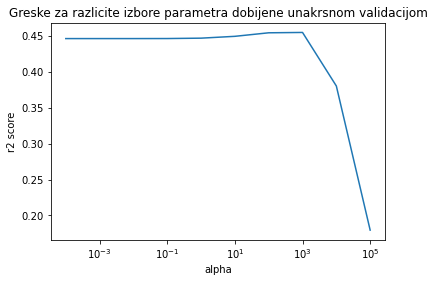

In [26]:
# nacrtajmo r2 skor na validacionom skupu za razlicite vrednosti parametra alpha
plt.plot(alphas, validation_scores)
plt.title('Greske za razlicite izbore parametra dobijene unakrsnom validacijom')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [27]:
print('R2 skor na skupu za validaciju: %.2f' %optimal_score) 

R2 skor na skupu za validaciju: 0.45


In [28]:
print('Optimalna vrednost parametra alpha: ', optimal_alpha)

Optimalna vrednost parametra alpha:  1000.0


In [105]:
# sada sa ovim optimalnim alfa pravimo model:

In [29]:
scaler2.fit(X_train_and_validation)
X_train_and_validation_new = scaler2.transform(X_train_and_validation)
X_test_new = scaler2.transform(X_test)

In [31]:
# model
ridge_regression = linear_model.Ridge(alpha=optimal_alpha)

In [32]:
# treniranje modela
ridge_regression.fit(X_train_and_validation_new, y_train_and_validation)

Ridge(alpha=1000.0)

In [33]:
# evaluacija 
ridge_regression_score = ridge_regression.score(X_test_new, y_test)

In [34]:
ridge_regression_mse = metrics.mean_squared_error(y_test, ridge_regression.predict(X_test_new))

In [35]:
print('R2 skor za model linearne regresije sa l2 regularizacijom: %.2f' %ridge_regression_score) 
print('MSE za model linearne regresije sa l2 regularizacijom: %.2f' %ridge_regression_mse) 

R2 skor za model linearne regresije sa l2 regularizacijom: 0.36
MSE za model linearne regresije sa l2 regularizacijom: 166.39


# Linearna regresija sa l1 regularizacijom (lasso regression)

In [111]:
# i ovde imamo regularizacioni parametar 
# uzecemo iste alfe kao i malopre

In [36]:
alphas

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05])

In [37]:
scaler3 = preprocessing.StandardScaler()

In [38]:
# unakrsnom validacijom biramo optimalno alpha
optimal_score = 0
optimal_alpha = 0
validation_scores = []

for alpha in alphas:
    model = linear_model.Lasso(alpha=alpha)
    l1_pipeline = pipeline.make_pipeline(scaler3, model)
    scores = model_selection.cross_val_score(l1_pipeline, X_train_and_validation, y_train_and_validation, scoring='r2', cv=10)
    score = scores.mean()
    validation_scores.append(score)
    
    if score > optimal_score:
        optimal_score = score
        optimal_alpha = alpha

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282493.7570210807, tolerance: 115.57180597890677
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275927.2673862362, tolerance: 115.3495415784136
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289005.5155424545, tolerance: 116.12063051574545
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

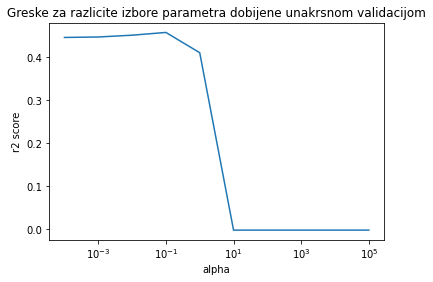

In [40]:
# crtamo grafika r2 skora na validacionom skupu za razlicite alphe
plt.plot(alphas, validation_scores)
plt.title('Greske za razlicite izbore parametra dobijene unakrsnom validacijom')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [41]:
print('R2 skor na skupu za validaciju: %.2f' %optimal_score) 

R2 skor na skupu za validaciju: 0.46


In [42]:
print('Optimalna vrednost parametra alpha: ', optimal_alpha)

Optimalna vrednost parametra alpha:  0.1


In [118]:
# sada sa ovim alfa praavimo konacan model

In [49]:
scaler3.fit(X_train_and_validation)
X_train_and_validation_l1 = scaler2.transform(X_train_and_validation)
X_test_l1 = scaler2.transform(X_test)

In [50]:
# model
lasso_regression = linear_model.Lasso(alpha=optimal_alpha)

In [51]:
# treniranje 
lasso_regression.fit(X_train_and_validation_l1, y_train_and_validation)

Lasso(alpha=0.1)

In [52]:
# evaluacija
lasso_regression_score = lasso_regression.score(X_test_l1, y_test)

In [53]:
lasso_regression_mse = metrics.mean_squared_error(y_test, lasso_regression.predict(X_test_l1))

In [54]:
print('R2 skor za model linearne regresije sa l1 regularizacijom: %.2f' %lasso_regression_score) 
print('MSE za model linearne regresije sa l1 regularizacijom: %.2f' %lasso_regression_mse) 

R2 skor za model linearne regresije sa l1 regularizacijom: 0.36
MSE za model linearne regresije sa l1 regularizacijom: 166.19


In [57]:
lasso_regression.coef_

array([ 8.10188348e-01,  3.57370874e+00,  3.07345639e-01,  5.98722502e-01,
       -3.24691653e+00, -7.35838874e-01,  1.28444533e-01, -0.00000000e+00,
       -2.54892794e-01,  0.00000000e+00, -7.66242840e-01, -3.71858729e-01,
        0.00000000e+00, -1.15703935e-01, -0.00000000e+00,  1.13044686e-01,
        3.99126905e-01,  1.04499501e-01,  0.00000000e+00,  7.54537336e-01,
        0.00000000e+00,  3.77302905e-02, -0.00000000e+00, -7.12740741e-02,
        5.49403000e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.87053835e-01,  1.76737082e-02,  1.14065995e-01,
       -0.00000000e+00, -5.40559621e-03, -6.82846439e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.61936958e-02, -0.00000000e+00,
       -0.00000000e+00, -1.60925765e-01,  2.91687965e-02,  8.36753619e-02,
       -2.43762174e-01, -2.02476793e-01, -5.51391449e-02, -0.00000000e+00,
       -4.33748889e-02, -2.68629747e-01,  1.38306010e-01, -0.00000000e+00,
       -0.00000000e+00, -

# Metoda potpornih vektora za regularizaciju (SVR)

In [38]:
# koristicemo RBF kernel - on ima parametar gamma
# takodje imamo i parametar regularizacije C

In [39]:
gammas = np.array([0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0])
Cs = np.array([0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0])

In [ ]:
optimal_score = 0 
optimal_gamma = 0
optimal_C = 0
validation_scores = []

for gamma in gammas:
    for C in Cs:
        model = svm.SVR(kernel='rbf', gamma=gamma, C=C)
        scores = model_selection.cross_val_score(model, X_train_and_validation, y_train_and_validation, scoring='r2', cv=10)
        score = scores.mean()
        validation_scores.append(score)
        
        if score > optimal_score: 
            optimal_score = score
            optimal_gamma = gamma
            optimal_C = C

In [ ]:
print('R2 skor na skupu za validaciju: %.2f' %optimal_score) 

In [ ]:
print('Optimalna vrednost parametra gamma: ', optimal_gamma)
print('Optimalna vrednost parametra C: ', optimal_C)

In [ ]:
# sada sa ovim gamma praavimo konacan model
svm_regression = svm.SVR(kernel='rbf', gamma=optimal_gamma, C=optimal_C)

In [ ]:
# treniranje modela
svm_regression.fit(X_train_and_validation, y_train_and_validation)

In [ ]:
# evaluacija
svm_regression_score = svm_regression.score(X_test, y_test)

In [ ]:
svm_regression_mse = metrics.mean_squared_error(y_test, svm_regression.predict(X_test))

In [ ]:
print('R2 skor za model potpornih vektora: %.2f' %svm_regression_score) 
print('MSE za model potpornih vektora: %.2f' %svm_regression_mse) 